In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv("ds_salaries.csv")

In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df['experience_level'].replace({"EN":"Entry Level","MI":"Mid Level","SE":"Senior Level","EX":"Executive Level"},inplace=True)

In [ ]:
df['employment_type'].replace({"PT":"Part Time","FT":"Full Time","CT":"Contract","FL":"Freelance"},inplace=True)

In [ ]:
df['company_size'].replace({"S":"Small","M":"Medium","L":"Large"},inplace=True)

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid Level,Full Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,2020,Senior Level,Full Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2020,Senior Level,Full Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,2020,Mid Level,Full Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,2020,Senior Level,Full Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior Level,Full Time,Data Engineer,154000,USD,154000,US,100,US,Medium
603,2022,Senior Level,Full Time,Data Engineer,126000,USD,126000,US,100,US,Medium
604,2022,Senior Level,Full Time,Data Analyst,129000,USD,129000,US,0,US,Medium
605,2022,Senior Level,Full Time,Data Analyst,150000,USD,150000,US,100,US,Medium


In [ ]:
ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country',
}

df['employee_residence'] = df['employee_residence'].map(ISO3166)
df['company_location'] = df['company_location'].map(ISO3166)

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid Level,Full Time,Data Scientist,70000,EUR,79833,Germany,0,Germany,Large
1,2020,Senior Level,Full Time,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,Small
2,2020,Senior Level,Full Time,Big Data Engineer,85000,GBP,109024,United Kingdom (Great Britain),50,United Kingdom (Great Britain),Medium
3,2020,Mid Level,Full Time,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,Small
4,2020,Senior Level,Full Time,Machine Learning Engineer,150000,USD,150000,United States of America,50,United States of America,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior Level,Full Time,Data Engineer,154000,USD,154000,United States of America,100,United States of America,Medium
603,2022,Senior Level,Full Time,Data Engineer,126000,USD,126000,United States of America,100,United States of America,Medium
604,2022,Senior Level,Full Time,Data Analyst,129000,USD,129000,United States of America,0,United States of America,Medium
605,2022,Senior Level,Full Time,Data Analyst,150000,USD,150000,United States of America,100,United States of America,Medium


In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid Level,Full Time,Data Scientist,70000,EUR,79833,Germany,0,Germany,Large
1,2020,Senior Level,Full Time,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,Small
2,2020,Senior Level,Full Time,Big Data Engineer,85000,GBP,109024,United Kingdom (Great Britain),50,United Kingdom (Great Britain),Medium
3,2020,Mid Level,Full Time,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,Small
4,2020,Senior Level,Full Time,Machine Learning Engineer,150000,USD,150000,United States of America,50,United States of America,Large


Finding if corrections is happening

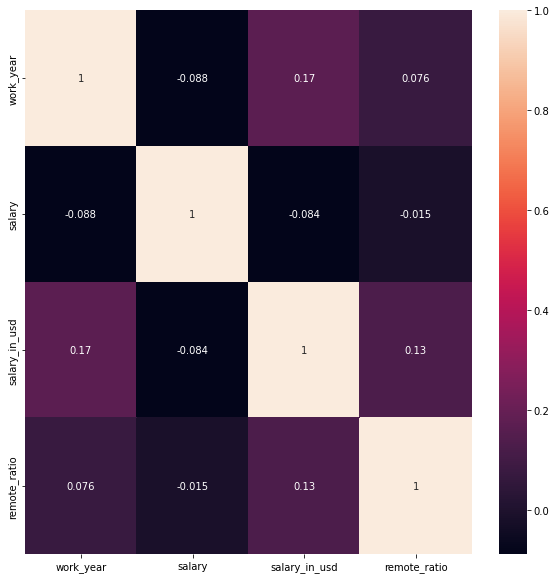

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()#Corr() method returns the numbers pairs in the dataframe.

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


Analyzing the distribution of experience levels

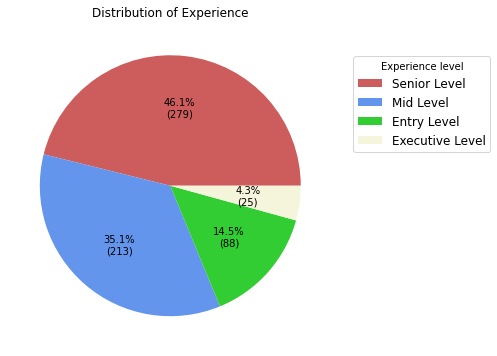

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Experience")

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(df['experience_level'].value_counts(),autopct=lambda pct: func(pct, df['experience_level'].value_counts()),colors=("indianred","cornflowerblue","limegreen","beige"))
plt.legend(loc="center right",
           labels=df['experience_level'].value_counts().index,
           bbox_to_anchor =(1, 0, 0.5, 1.5),
           title="Experience level",
           fontsize=12)

In [ ]:
px.bar(df['experience_level'].value_counts(),text_auto=True,title="Distribution of experience level")

Salary distribution of Executive Level Experience

In [ ]:
print("The salary of a person with Executive Level experience lies in the range",df.loc[df.experience_level=='Executive Level']['salary_in_usd'].min(),"USD and",df.loc[df.experience_level=='Executive Level']['salary_in_usd'].max(),"USD")
print("The median salary is",df.loc[df.experience_level=='Executive Level']['salary_in_usd'].median(),"USD")
px.histogram(df.loc[df.experience_level=='Executive Level']['salary_in_usd'],histnorm='percent',text_auto = '.2f',template = 'presentation')

The salary of a person with Executive Level experience lies in the range 69741 USD and 600000 USD
The median salary is 171437.5 USD


Salary distribution of Senior Level Experience

In [ ]:
df_s=df.loc[df.experience_level=='Senior Level']
df_s

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2020,Senior Level,Full Time,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,Small
2,2020,Senior Level,Full Time,Big Data Engineer,85000,GBP,109024,United Kingdom (Great Britain),50,United Kingdom (Great Britain),Medium
4,2020,Senior Level,Full Time,Machine Learning Engineer,150000,USD,150000,United States of America,50,United States of America,Large
6,2020,Senior Level,Full Time,Lead Data Scientist,190000,USD,190000,United States of America,100,United States of America,Small
9,2020,Senior Level,Full Time,Lead Data Engineer,125000,USD,125000,New Zealand,50,New Zealand,Small
...,...,...,...,...,...,...,...,...,...,...,...
597,2022,Senior Level,Full Time,Data Analyst,170000,USD,170000,United States of America,100,United States of America,Medium
602,2022,Senior Level,Full Time,Data Engineer,154000,USD,154000,United States of America,100,United States of America,Medium
603,2022,Senior Level,Full Time,Data Engineer,126000,USD,126000,United States of America,100,United States of America,Medium
604,2022,Senior Level,Full Time,Data Analyst,129000,USD,129000,United States of America,0,United States of America,Medium


In [ ]:
df_s['experience_level'].value_counts()

Senior Level    280
Name: experience_level, dtype: int64

In [ ]:
print("The salary of an employee at Senior Level ranges between ",df_s['salary_in_usd'].min(),'USD and',df_s['salary_in_usd'].max(),"USD")
print("The median salary is ",df_s['salary_in_usd'].median(),"USD")
px.histogram(df_s['salary_in_usd'],histnorm='percent',text_auto = '.2f',template = 'presentation')

The salary of an employee at Senior Level ranges between  18907 USD and 412000 USD
The median salary is  135500.0 USD


Salary distribution of Mid Level Experience

In [ ]:
print("The salary of a person with Mid Level experience lies in the range",df.loc[df.experience_level=='Mid Level']['salary_in_usd'].min(),"USD and",df.loc[df.experience_level=='Mid Level']['salary_in_usd'].max(),"USD")
print("The median salary is",df.loc[df.experience_level=='Mid Level']['salary_in_usd'].median(),"USD")
px.histogram(df.loc[df.experience_level=='Mid Level']['salary_in_usd'],histnorm='percent',text_auto = '.2f',template = 'presentation')

The salary of a person with Mid Level experience lies in the range 2859 USD and 450000 USD
The median salary is 76940.0 USD


Salary distribution of Entry Level Experience

In [ ]:
print("The salary of a person with Entry Level experience lies in the range",df.loc[df.experience_level=='Entry Level']['salary_in_usd'].min(),"USD and",df.loc[df.experience_level=='Entry Level']['salary_in_usd'].max(),"USD")
print("The median salary is",df.loc[df.experience_level=='Entry Level']['salary_in_usd'].median(),"USD")
px.histogram(df.loc[df.experience_level=='Entry Level']['salary_in_usd'],histnorm='percent',text_auto = '.2f',template = 'presentation')

The salary of a person with Entry Level experience lies in the range 4000 USD and 250000 USD
The median salary is 56500.0 USD


Analyzing the company size

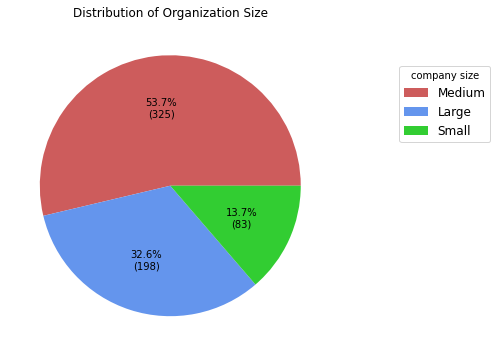

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Organization Size")

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(df['company_size'].value_counts(),autopct=lambda pct: func(pct, df['company_size'].value_counts()),colors=("indianred","cornflowerblue","limegreen","beige"))
plt.legend(loc="center right",
           labels=df['company_size'].value_counts().index,
           bbox_to_anchor =(1, 0, 0.5, 1.5),
           title="company size",
           fontsize=12)

Salary distribution for a Large sized company

In [ ]:
print("The salary of a person in a Large company lies in the range of",df.loc[df['company_size']=='Large']['salary_in_usd'].min(),'USD and',df.loc[df['company_size']=='Large']['salary_in_usd'].max(),'USD')
print("The median salary is",df.loc[df['company_size']=='Large']['salary_in_usd'].median())
px.histogram(df.loc[df['company_size']=='Large']['salary_in_usd'],histnorm='percent',text_auto = '.2f',template = 'presentation')

The salary of a person in a Large company lies in the range of nan USD and nan USD
The median salary is nan


Salary distribution for a Medium sized company

In [ ]:
print("The salary of a person in a Medium company lies in the range of",df.loc[df['company_size']=='Medium']['salary_in_usd'].min(),'USD and',df.loc[df['company_size']=='Medium']['salary_in_usd'].max(),'USD')
print("The median salary is",df.loc[df['company_size']=='Medium']['salary_in_usd'].median())
px.histogram(df.loc[df['company_size']=='Medium']['salary_in_usd'],histnorm='percent',text_auto = '.2f',template = 'presentation')

The salary of a person in a Medium company lies in the range of nan USD and nan USD
The median salary is nan


Salary distribution for a Small sized company

In [ ]:
print("The salary of a person in a Large company lies in the range of",df.loc[df['company_size']=='Small']['salary_in_usd'].min(),'USD and',df.loc[df['company_size']=='Small']['salary_in_usd'].max(),'USD')
print("The median salary is",df.loc[df['company_size']=='Small']['salary_in_usd'].median())
px.histogram(df.loc[df['company_size']=='Small']['salary_in_usd'],histnorm='percent',text_auto = '.2f',template = 'presentation')

The salary of a person in a Large company lies in the range of nan USD and nan USD
The median salary is nan


Maximum salary for various job titles

In [ ]:
df.groupby('job_title')['salary_in_usd'].max().sort_values().to_frame().rename({'job_title':"Job Title",'salary_in_usd':"Max Salary"},axis=1)

,Max Salary
job_title,
3D Computer Vision Researcher,5409
Product Data Analyst,20000
NLP Engineer,37236
ETL Developer,54957
Finance Data Analyst,61896
Head of Machine Learning,79039
Lead Machine Learning Engineer,87932
Marketing Data Analyst,88654
Big Data Architect,99703


In [ ]:
df.pivot_table(values='salary_in_usd',index='job_title',columns='employment_type',aggfunc={'salary_in_usd':np.max})

employment_type,CT,FL,FT,PT
job_title,,,,
3D Computer Vision Researcher,NaN,NaN,NaN,5409.0
AI Scientist,NaN,NaN,200000.0,12000.0
Analytics Engineer,NaN,NaN,205300.0,NaN
Applied Data Scientist,NaN,NaN,380000.0,NaN
Applied Machine Learning Scientist,31875.0,NaN,423000.0,NaN
BI Data Analyst,NaN,NaN,150000.0,NaN
Big Data Architect,NaN,NaN,99703.0,NaN
Big Data Engineer,NaN,NaN,114047.0,NaN
Business Data Analyst,100000.0,NaN,135000.0,NaN
